In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy
import get_data

In [2]:
df = pd.read_sql_query('SELECT datadate,gvkey,cusip,INVTQ,LCTQ,ACTQ FROM quarterly',get_data.engine)
df.head()
# quick ratio = (current assets - inventory)/current liabilities 
# INVTQ - inventory total 
# LCTQ - current liabilites total 
# ACTQ - current assets total 

,datadate,gvkey,cusip,invtq,lctq,actq
0,2013-06-30,028967,74727A104,5.942,NaN,NaN
1,2013-09-30,028967,74727A104,9.942,NaN,NaN
2,2013-12-31,028967,74727A104,11.087,NaN,NaN
3,2014-03-31,028967,74727A104,9.967,NaN,NaN
4,2014-06-30,028967,74727A104,12.253,NaN,NaN


In [3]:
df = df.dropna(axis = 0)

In [4]:
#remove rows with current assets or current liabilites less than or equal to 0
#remove rows with inventory less than 0 (maybe it is possible to have 0 inventory?)
df = df[(df['actq'] > 0) & (df['lctq'] > 0) & (df['invtq'] >= 0)]

In [5]:
df['quick_ratio'] = (df['actq']-df['invtq'])/df['lctq']

In [6]:
print(max(df['quick_ratio']), min(df['quick_ratio']))

953.9999999999999 -0.03661395907189612


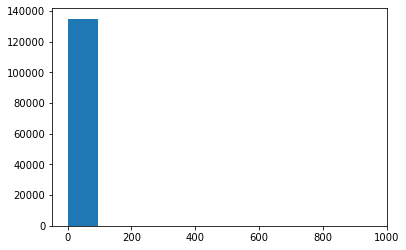

In [7]:
plt.hist(df['quick_ratio']);

In [8]:
# see if removing rows where inventory = 0 makes more sense since some of these ratios are very large
df2 = df[df['invtq'] > 0]

In [9]:
print(max(df2['quick_ratio']), min(df2['quick_ratio']))

82.61208117036337 -0.03661395907189612


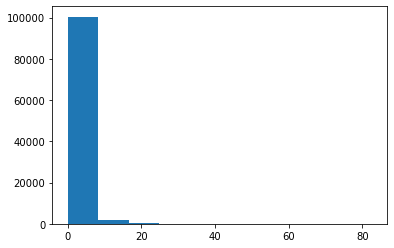

In [10]:
plt.hist(df2['quick_ratio']);